## Create Latitude and Longitude Combinations

In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [17]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

The code on the cell above:
    
• We create a cities list to store city names.

• We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.

• We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 

We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

# Get the City Weather Data

MOdule 6.2.6

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
8. Parse the JSON weather data for the following:

    • City, country, and date
    
    • Latitude and longitude
    
    • Maximum temperature
    
    • Humidity
    
    • Cloudiness
    
    • Wind speed
    
    
9. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


## Import Dependencies, and Initialize an Empty List and Counters

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kawalu
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | usinsk
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | simga
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | askiz
Processing Record 16 of Set 1 | chara
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | show low
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | plerin
Processing Record 22 of Set 1 | fortuna
Processing Record 23 of Set 1 | boa vista
Processing Record 24 of Set 1 | taolanaro
City not found. Skipping...
Proce

Processing Record 44 of Set 4 | bulungu
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | talcahuano
Processing Record 47 of Set 4 | sargatskoye
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | thabazimbi
Processing Record 50 of Set 4 | awbari
Processing Record 1 of Set 5 | egvekinot
Processing Record 2 of Set 5 | tabas
Processing Record 3 of Set 5 | muzhi
Processing Record 4 of Set 5 | rawson
Processing Record 5 of Set 5 | lagoa
Processing Record 6 of Set 5 | key west
Processing Record 7 of Set 5 | santa cruz del sur
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | maceio
Processing Record 11 of Set 5 | bekhtery
Processing Record 12 of Set 5 | cap malheureux
Processing Record 13 of Set 5 | cabo san lucas
Processing Record 14 of Set 5 | wilkie
Processing Record 15 of Set 5 | butaritari
Processing Record 16 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 5 |

Processing Record 31 of Set 8 | helong
Processing Record 32 of Set 8 | christchurch
Processing Record 33 of Set 8 | kangaatsiaq
Processing Record 34 of Set 8 | kon tum
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | gasa
Processing Record 38 of Set 8 | palu
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | pontes e lacerda
Processing Record 41 of Set 8 | chagoda
Processing Record 42 of Set 8 | gravdal
Processing Record 43 of Set 8 | karaul
City not found. Skipping...
Processing Record 44 of Set 8 | esperance
Processing Record 45 of Set 8 | mikkeli
Processing Record 46 of Set 8 | kodinar
Processing Record 47 of Set 8 | uvat
Processing Record 48 of Set 8 | gossas
Processing Record 49 of Set 8 | nanortalik
Processing Record 50 of Set 8 | buchanan
Processing Record 1 of Set 9 | kawana waters
City not found. Skipping...
Processing Record 2 of Set 9 | colac
Processing Reco

Processing Record 20 of Set 12 | nan
Processing Record 21 of Set 12 | huarmey
Processing Record 22 of Set 12 | gazojak
Processing Record 23 of Set 12 | bridlington
Processing Record 24 of Set 12 | neryungri
Processing Record 25 of Set 12 | tiznit
Processing Record 26 of Set 12 | biltine
Processing Record 27 of Set 12 | shache
Processing Record 28 of Set 12 | mandera
Processing Record 29 of Set 12 | neya
Processing Record 30 of Set 12 | tuysarkan
City not found. Skipping...
Processing Record 31 of Set 12 | taltal
Processing Record 32 of Set 12 | prince rupert
Processing Record 33 of Set 12 | fort collins
Processing Record 34 of Set 12 | jam sahib
Processing Record 35 of Set 12 | kupang
Processing Record 36 of Set 12 | hvide sande
Processing Record 37 of Set 12 | houma
Processing Record 38 of Set 12 | tiarei
Processing Record 39 of Set 12 | kautokeino
Processing Record 40 of Set 12 | leningradskiy
Processing Record 41 of Set 12 | dwarka
Processing Record 42 of Set 12 | kungurtug
Processi

# Create a DataFrame of City Weather Data

Module 6.2.7

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kawalu,-7.3817,108.2082,73.54,90,99,1.48,ID,2022-03-01 15:10:12
1,Port Hardy,50.6996,-127.4199,45.75,92,81,13.06,CA,2022-03-01 15:10:13
2,Cape Town,-33.9258,18.4232,78.12,66,2,11.83,ZA,2022-03-01 15:07:30
3,Albany,42.6001,-73.9662,33.73,55,100,4.00,US,2022-03-01 15:10:13
4,Usinsk,65.9939,57.5281,10.94,95,50,11.41,RU,2022-03-01 15:10:13
5,Port Lincoln,-34.7333,135.8667,63.21,92,20,7.36,AU,2022-03-01 15:10:14
6,Rikitea,-23.1203,-134.9692,79.84,69,72,12.01,PF,2022-03-01 15:10:14
7,Touros,-5.1989,-35.4608,92.30,59,53,16.53,BR,2022-03-01 15:10:14
8,Simga,21.6333,81.7000,81.12,21,75,2.37,IN,2022-03-01 15:10:15
9,Mehamn,71.0357,27.8492,32.18,93,75,14.97,NO,2022-03-01 15:10:15


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kawalu,ID,2022-03-01 15:10:12,-7.3817,108.2082,73.54,90,99,1.48
1,Port Hardy,CA,2022-03-01 15:10:13,50.6996,-127.4199,45.75,92,81,13.06
2,Cape Town,ZA,2022-03-01 15:07:30,-33.9258,18.4232,78.12,66,2,11.83
3,Albany,US,2022-03-01 15:10:13,42.6001,-73.9662,33.73,55,100,4.00
4,Usinsk,RU,2022-03-01 15:10:13,65.9939,57.5281,10.94,95,50,11.41
5,Port Lincoln,AU,2022-03-01 15:10:14,-34.7333,135.8667,63.21,92,20,7.36
6,Rikitea,PF,2022-03-01 15:10:14,-23.1203,-134.9692,79.84,69,72,12.01
7,Touros,BR,2022-03-01 15:10:14,-5.1989,-35.4608,92.30,59,53,16.53
8,Simga,IN,2022-03-01 15:10:15,21.6333,81.7000,81.12,21,75,2.37
9,Mehamn,NO,2022-03-01 15:10:15,71.0357,27.8492,32.18,93,75,14.97


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature
Module 6.3.1 

## Get Data for Plotting

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Plot Latitude vs. Max Temperature

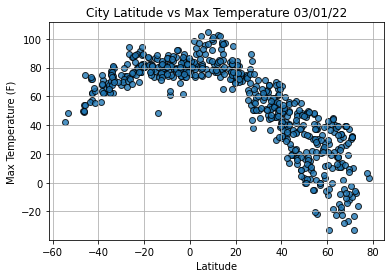

In [39]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

# Plot Latitude vs. Humidity

Module 6.3.2

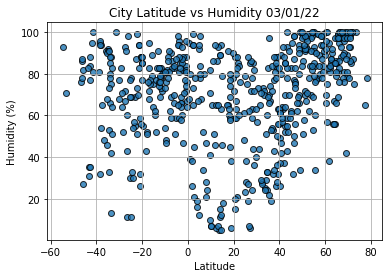

In [40]:
# Import time module
import time
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

# Plot Latitude vs. Cloudiness

Module 6.3.3

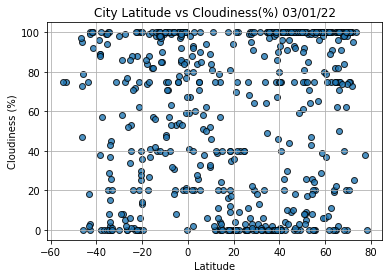

In [43]:
# Import time module
import time
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness(%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

# Plot Latitude vs. Wind Speed
Module 6.3.4

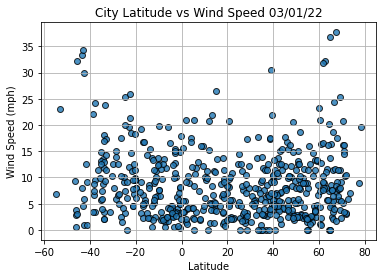

In [48]:
# Import time module
import time
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()